Google doc link:https://docs.google.com/document/d/1tgWtZDwh1GHVXZXUuXX2kmQ7dn88zWzOPNkn7GZvtNQ/edit?usp=sharing

In [1]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_style('darkgrid')

In [2]:
# Read data
listings = pd.read_csv('listings_clean.csv', index_col=0)
listings.reset_index(inplace=True)
listings = listings[listings.price <= 1000]

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7013 entries, 0 to 7092
Data columns (total 70 columns):
index                                           7013 non-null int64
id                                              7013 non-null int64
host_id                                         7013 non-null int64
host_since                                      7013 non-null object
host_location                                   7013 non-null object
host_response_time                              7013 non-null object
host_response_rate                              7013 non-null float64
host_is_superhost                               7013 non-null object
host_listings_count                             7013 non-null int64
host_verifications                              7013 non-null object
host_has_profile_pic                            7013 non-null object
host_identity_verified                          7013 non-null object
street                                          7013 non-null object

In [5]:
corr = listings.corr()

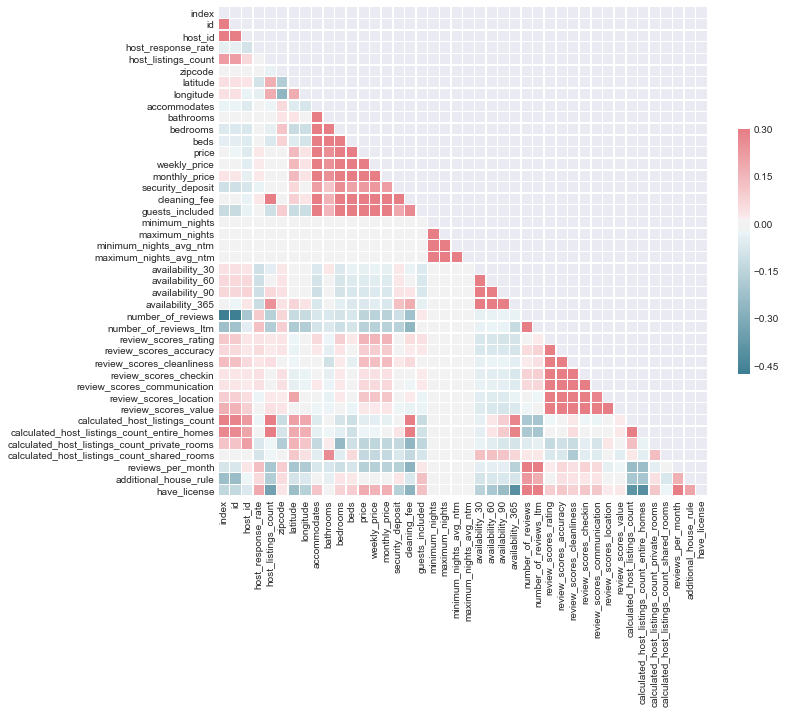

In [6]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
# t-test 

# price by superhost
from scipy.stats import ttest_ind

stat, p = ttest_ind(listings[listings.host_is_superhost == 't'].price,
                    listings[listings.host_is_superhost == 'f'].price)
print(stat, p/2)

1.1246742661325744 0.1303827964825249


In [10]:
# number of reviews by superhost
stat, p = ttest_ind(listings[listings.host_is_superhost == 't'].number_of_reviews,
                    listings[listings.host_is_superhost == 'f'].number_of_reviews)
print(stat, p/2)

25.627709478819025 7.643811118152931e-139


In [11]:
# Correlation test

# price vs review scores

from scipy.stats import spearmanr
corr, p = spearmanr(listings.price, listings.review_scores_rating)
print(corr, p)

0.22051071738255473 5.577583589682652e-78


In [12]:
from scipy.stats import kendalltau
corr, p = kendalltau(listings.price, listings.review_scores_rating)
print(corr, p)

0.1605764251231378 1.9685266796513885e-78


In [13]:
corr, p = spearmanr(listings.price, listings.number_of_reviews)
print(corr, p)

-0.10833741444386644 9.222986786490563e-20


In [14]:
corr, p = kendalltau(listings.price, listings.number_of_reviews)
print(corr, p)

-0.0722888626486661 9.991171646250661e-19
